In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import yellowbrick
from yellowbrick.features import Rank2D
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [21]:
df1 = pd.read_csv("data.csv")
df1.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [23]:
df2 = df1.drop(["target", "song_title", "artist"], axis=1)
df2.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904


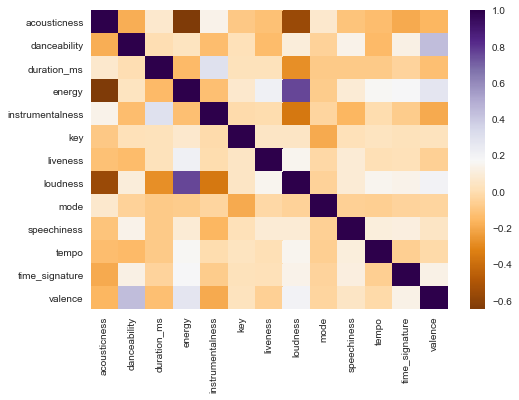

In [28]:
# Pearson Correlation matrix

corr_matrix = df2.corr()
sns.heatmap(corr_matrix, cmap='PuOr')

In [30]:
x = df2.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df3 = pd.DataFrame(x_scaled)
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.010248,0.824826,0.190735,0.426363,0.022439,0.181818,0.153862,0.741141,1.0,0.514441,0.596033,0.75,0.262432
1,0.199998,0.720418,0.314481,0.350081,0.006260,0.090909,0.124395,0.692162,1.0,0.071005,0.654474,0.75,0.577936
2,0.034570,0.830626,0.171624,0.403987,0.000240,0.181818,0.147548,0.791369,1.0,0.335351,0.158539,0.75,0.144379
3,0.607034,0.431555,0.185488,0.328723,0.522541,0.454545,0.077247,0.544709,1.0,0.003784,0.225162,0.75,0.203928
4,0.180902,0.645012,0.381202,0.555533,0.524590,0.454545,0.442223,0.654132,0.0,0.058393,0.735659,0.75,0.908065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.001062,0.535963,0.261345,0.932872,0.002756,0.090909,0.115976,0.902592,1.0,0.390844,0.158142,0.75,0.184079
2013,0.088138,0.895592,0.168058,0.892189,0.001711,0.090909,0.035782,0.928149,1.0,0.136083,0.362636,0.75,0.869411
2014,0.008610,0.597448,0.193365,0.935924,0.004088,0.000000,0.205430,0.934126,1.0,0.105814,0.596150,0.75,0.454659
2015,0.001645,0.504640,0.171516,0.993897,0.693648,0.090909,0.076300,0.925953,1.0,0.138605,0.595736,0.75,0.614501


/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


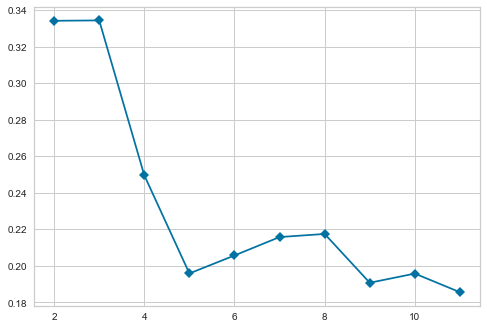

In [35]:
# finding k value through Elbow Method

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
visualizer.fit(x_scaled)
score = visualizer.elbow_score_
value = visualizer.elbow_value_

In [36]:
# k = 5

In [40]:
# running k means function

kmeans = KMeans(init="k-means++",
                n_clusters=4,
                random_state=15,
                max_iter = 500).fit(x_scaled)
df3['kmeans'] = kmeans.labels_
df3.columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
               'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'kmeans']
df3

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,kmeans
0,0.010248,0.824826,0.190735,0.426363,0.022439,0.181818,0.153862,0.741141,1.0,0.514441,0.596033,0.75,0.262432,2
1,0.199998,0.720418,0.314481,0.350081,0.006260,0.090909,0.124395,0.692162,1.0,0.071005,0.654474,0.75,0.577936,2
2,0.034570,0.830626,0.171624,0.403987,0.000240,0.181818,0.147548,0.791369,1.0,0.335351,0.158539,0.75,0.144379,2
3,0.607034,0.431555,0.185488,0.328723,0.522541,0.454545,0.077247,0.544709,1.0,0.003784,0.225162,0.75,0.203928,3
4,0.180902,0.645012,0.381202,0.555533,0.524590,0.454545,0.442223,0.654132,0.0,0.058393,0.735659,0.75,0.908065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.001062,0.535963,0.261345,0.932872,0.002756,0.090909,0.115976,0.902592,1.0,0.390844,0.158142,0.75,0.184079,2
2013,0.088138,0.895592,0.168058,0.892189,0.001711,0.090909,0.035782,0.928149,1.0,0.136083,0.362636,0.75,0.869411,2
2014,0.008610,0.597448,0.193365,0.935924,0.004088,0.000000,0.205430,0.934126,1.0,0.105814,0.596150,0.75,0.454659,2
2015,0.001645,0.504640,0.171516,0.993897,0.693648,0.090909,0.076300,0.925953,1.0,0.138605,0.595736,0.75,0.614501,2


In [41]:
kmeans = df3['kmeans']
df2['kmeans'] = kmeans

In [ ]:
# fig = px.scatter_3d(df2, x='energy', y='instrumentalness', z='loudness',
#               color='kmeans')
fig.show()